In [ ]:
# Copyright 2025 @Yucheng Wang
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Gemini 2.5 Pro

>
<table align="left">
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FYuchengWang%2FOptionAnalyze%2Frefs%2Fheads%2Fmain%2Foption_analyze_using_gemini_2.5_pro.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/YuchengWang/OptionAnalyze/refs/heads/main/option_analyze_using_gemini_2.5_pro.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/YuchengWang/OptionAnalyze/blob/main/option_analyze_using_gemini_2.5_pro.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/YuchengWang/OptionAnalyze/blob/main/option_analyze_using_gemini_2.5_pro.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/YuchengWang/OptionAnalyze/blob/main/option_analyze_using_gemini_2.5_pro.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/YuchengWang/OptionAnalyze/blob/main/option_analyze_using_gemini_2.5_pro.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/YuchengWang/OptionAnalyze/blob/main/option_analyze_using_gemini_2.5_pro.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/YuchengWang/OptionAnalyze/blob/main/option_analyze_using_gemini_2.5_pro.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>


| Authors |
| --- |
| [Yucheng Wang](https://github.com/YuchengWang) |

## Acknowledgements / References

This Colab notebook draws inspiration from and references concepts demonstrated in the official Google Cloud Platform Generative AI examples, particularly:

*   [Intro to Gemini 2.5 Pro](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_5_pro.ipynb)

## Overview

[Gemini 2.5 Pro](https://blog.google/technology/google-deepmind/gemini-model-thinking-updates-march-2025/) is Google's strongest model for coding and world knowledge.

With the 2.5 series, the Gemini models are now hybrid reasoning models! Gemini 2.5 Pro can apply an extended amount of thinking across tasks, and use tools in order to maximize response accuracy.

Gemini 2.5 Pro is:

- A significant improvement from previous models across capabilities including coding, reasoning, and multimodality
- Industry-leading in reasoning with state of the art performance in Math & STEM benchmarks
- An amazing model for code, with particularly strong web development
- Particularly good for complex prompts, while still being well rounded

### Objectives

In this tutorial, you'll master using the **Google Generative AI Python SDK** to harness the power of the **Gemini API** and the **Gemini 2.5 Pro** model. We'll dive deep into analyzing complex options data to generate optimal trading strategies and actionable recommendations.

You will complete the following tasks:



## 1. Setup and Configuration

### 1.1 Install Necessary Libraries
First, we need to install the Google Generative AI SDK.


In [2]:
%pip install --upgrade pip -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00


In [3]:
%pip install --upgrade --quiet google-genai

### Connect to a generative AI API service

Google Gen AI APIs and models including Gemini are available in the following two API services:

- **[Gemini Developer API](https://ai.google.dev/gemini-api/docs)**: Experiment, prototype, and deploy small projects.
- **[Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview)**: Build enterprise-ready projects on Google Cloud.

The Google Gen AI SDK provides a unified interface to these two API services.

### Import libraries


In [5]:
from IPython.display import HTML, Image, Markdown, display
from google import genai
from google.genai.types import (
    FunctionDeclaration,
    GenerateContentConfig,
    GoogleSearch,
    HarmBlockThreshold,
    HarmCategory,
    Part,
    SafetySetting,
    ThinkingConfig,
    Tool,
    ToolCodeExecution,
)

### Set up Google Cloud Project or API Key for Vertex AI

You'll need to set up authentication by choosing **one** of the following methods:

1.  **Use a Google Cloud Project:** Recommended for most users, this requires enabling the Vertex AI API in your Google Cloud project.
    - [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com)
    - Run the cell below to set your project ID and location.
    - Read more about [Supported locations](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/locations)
2.  **Use a Vertex AI API Key (Express Mode):** For quick experimentation.
    - [Get an API Key](https://cloud.google.com/vertex-ai/generative-ai/docs/start/express-mode/overview)
    - Run the cell further below to use your API key.

#### Option 1. Use a Google Cloud Project

In [6]:
import os

PROJECT_ID = "cloud-ai-user-auth"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "global")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

Project: cloud-ai-user-auth
Location: us-central1


#### Option 2. Use a Vertex AI API Key (Express Mode)

Uncomment the following block to use Express Mode

In [ ]:
# API_KEY = "[your-api-key]"  # @param {type: "string", placeholder: "[your-api-key]", isTemplate: true}

# if not API_KEY or API_KEY == "[your-api-key]":
#     raise Exception("You must provide an API key to use Vertex AI in express mode.")

# client = genai.Client(vertexai=True, api_key=API_KEY)

Verify which mode you are using.

In [7]:
if not client.vertexai:
    print("Using Gemini Developer API.")
elif client._api_client.project:
    print(
        f"Using Vertex AI with project: {client._api_client.project} in location: {client._api_client.location}"
    )
elif client._api_client.api_key:
    print(
        f"Using Vertex AI in express mode with API key: {client._api_client.api_key[:5]}...{client._api_client.api_key[-5:]}"
    )

Using Vertex AI with project: cloud-ai-user-auth in location: us-central1


## Use the Gemini 2.5 Pro model

### Load the Gemini 2.5 Pro model

Learn more about all [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).

In [8]:
MODEL_ID = "gemini-2.5-pro-preview-05-06"  # @param {type: "string"}

### Generate text from text prompts

Use the `generate_content()` method to generate responses to your prompts.

You can pass text to `generate_content()`, and use the `.text` property to get the text content of the response.

By default, Gemini outputs formatted text using [Markdown](https://daringfireball.net/projects/markdown/) syntax.

In [9]:
response = client.models.generate_content(
    model=MODEL_ID, contents="Where are you from?"
)

display(Markdown(response.text))

I am a large language model, trained by Google.

## Essential Option Data Points for Analysis (US Stocks)

When analyzing options, you'll want a comprehensive set of data. Here are the key pieces of information and why they are important:

1.  **Underlying Asset Information:**
    *   **Ticker Symbol:** (e.g., `AAPL`, `MSFT`) - Identifies the stock.
    *   **Current Underlying Price:** The current market price of the stock. Crucial for determining if an option is in-the-money (ITM), at-the-money (ATM), or out-of-the-money (OTM).

2.  **Option Contract Specifics:**
    *   **Contract Symbol / Name:** The unique identifier for the option contract (e.g., `AAPL241220C00180000`).
    *   **Option Type:**
        *   **Call:** Gives the holder the right, but not the obligation, to *buy* the underlying asset at the strike price on or before the expiration date.
        *   **Put:** Gives the holder the right, but not the obligation, to *sell* the underlying asset at the strike price on or before the expiration date.
    *   **Strike Price:** The predetermined price at which the underlying asset can be bought (for calls) or sold (for puts).
    *   **Expiration Date:** The date on which the option contract expires and becomes worthless if not exercised or sold.

3.  **Market Data for the Option:**
    *   **Last Price:** The price at which the option last traded.
    *   **Bid Price:** The highest price a buyer is willing to pay for the option.
    *   **Ask Price:** The lowest price a seller is willing to accept for the option.
    *   **Mid Price:** (`(Bid + Ask) / 2`) - Often a better representation of the "true" market price than `Last Price`, especially for less liquid options.
    *   **Change:** The change in the option's price from the previous trading day's close.
    *   **% Change:** The percentage change in the option's price.
    *   **Volume:** The number of contracts traded during the current trading session. Indicates liquidity and interest.
    *   **Open Interest (OI):** The total number of outstanding option contracts that have not been settled or closed. High OI generally indicates good liquidity.

4.  **The "Greeks" (Sensitivity Measures):**
    *   **Implied Volatility (IV):** The market's forecast of a likely movement in the underlying asset's price. It's a key component in option pricing. High IV means options are more expensive, and vice-versa. It's "implied" from the option's current market price.
    *   **Delta:** Measures the rate of change of the option's price relative to a $1 change in the underlying asset's price. Ranges from 0 to 1 for calls, and -1 to 0 for puts. An ATM option typically has a Delta around 0.50 (or -0.50 for puts).
    *   **Gamma:** Measures the rate of change in an option's Delta relative to a $1 change in the underlying asset's price. Highest for ATM options.
    *   **Theta:** Measures the rate of change of an option's price relative to time decay (as the option approaches expiration). It's usually negative, as options lose value over time (all else being equal).
    *   **Vega:** Measures the rate of change of an option's price relative to a 1% change in implied volatility.
    *   **Rho:** Measures the rate of change of an option's price relative to a 1% change in interest rates (less impactful for short-dated options).

**Why these are important for analysis with Gemini:**

You can feed these data points into Gemini (like in the Colab framework previously discussed) to:
*   Ask for suitable strategies given the current market price, IV, and your market outlook.
*   Understand the risk/reward profile of specific options.
*   Get explanations of how different Greeks might affect a potential position.
*   Ask for Bullish/Bearish/Neutral strategies.



## Download Options Dataset from Kaggle


Downloading dataset from Kaggle

Login Kaggle and visit [kaggle setting](https://www.kaggle.com/settings), Generate file kaggle.json from API section. The kaggle.json file automatically download to your PC device.

In [16]:
%pip install kaggle

# Upload kaggle.json（API Token）
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yuchengwang","key":"005e70064f60df3096d60455be125330"}'}

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download Option dataset

In [19]:
# List option dataset

!kaggle datasets list -s "options"

ref                                                     title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sunnysai12345/nse-future-and-options-dataset-3m         NSE Future and Options Dataset 3M             34MB  2019-11-23 19:33:45           1295         29  0.9411765        
muhammadanas0716/tradyflow-options-trading              Tradyflow - Options Trading!                 203KB  2022-06-24 03:39:27            316         11  0.9705882        
tanay001/nseindia-futures-options-daily                 NSE India Futures & Options Daily (2000-20)    1GB  2020-09-06 18:50:02           1340         58  1.0              
ninetyninenewton/vkospi                                 Options in Korean Stock Market                93KB  2021-01-11 07:35:42        

Download Dataset

In [23]:

OPTION_DATASET = "kylegraupe/aapl-options-data-2016-2020"  # @param {type: "string"}
!kaggle datasets download -d {OPTION_DATASET}

DATASET_ZIP = OPTION_DATASET.split("/")[-1] + ".zip"
!unzip {DATASET_ZIP}

Dataset URL: https://www.kaggle.com/datasets/kylegraupe/aapl-options-data-2016-2020
License(s): CC0-1.0
 98% 108M/110M [00:00<00:00, 229MB/s] 
100% 110M/110M [00:00<00:00, 216MB/s]
Archive:  aapl-options-data-2016-2020.zip
  inflating: aapl_2016_2020.csv      
  inflating: aapl_2021_2023.csv      


## Analyze Option Data

Load dataset to pandas and ask Gemini to answer questions.

### Ask For 10 lines of data

In [25]:
# Load the CSV file
df = pd.read_csv("aapl_2021_2023.csv")
print("Successfully loaded the file. Number of rows:", len(df))
print("Sample data:")
print(df.head())

# Convert a sample of data to string to avoid too long prompt
sample_data = df.head(10).to_csv(index=False)

# Define the prompt for Gemini model
prompt = f"""
You are a financial data analyst. Below is a sample of Apple options trading data from 2021 to 2023:
{sample_data}
Please answer the following questions based on this data:
1. Which option contracts are the most actively traded? (based on volume or open interest)
2. Are there any strike prices with unusually large trading volume?
3. Overall, does the market sentiment appear bullish or bearish on AAPL during this period?
4. Please summarize these observations for further strategy analysis.
"""

# Call Gemini 2.5 pro model
response = client.models.generate_content(
    model=MODEL_ID, contents=prompt
)

display(Markdown(response.text))

<ipython-input-25-d10a0a975acc>:2: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("aapl_2021_2023.csv")


Successfully loaded the file. Number of rows: 548163
Sample data:
   [QUOTE_UNIXTIME]   [QUOTE_READTIME]  [QUOTE_DATE]   [QUOTE_TIME_HOURS]  \
0        1656705600   2022-07-01 16:00    2022-07-01                 16.0   
1        1656705600   2022-07-01 16:00    2022-07-01                 16.0   
2        1656705600   2022-07-01 16:00    2022-07-01                 16.0   
3        1656705600   2022-07-01 16:00    2022-07-01                 16.0   
4        1656705600   2022-07-01 16:00    2022-07-01                 16.0   

    [UNDERLYING_LAST]  [EXPIRE_DATE]   [EXPIRE_UNIX]   [DTE]   [C_DELTA]  \
0               138.9     2022-07-01      1656705600     0.0     1.00000   
1               138.9     2022-07-01      1656705600     0.0     1.00000   
2               138.9     2022-07-01      1656705600     0.0     1.00000   
3               138.9     2022-07-01      1656705600     0.0     1.00000   
4               138.9     2022-07-01      1656705600     0.0     0.99404   

    [C_GAMMA] 

Okay, as a financial data analyst, let's break down this sample of Apple (AAPL) options trading data.

**Important Caveats before we begin:**
1.  **Extremely Limited Sample:** This is a tiny snapshot (10 rows) for a single expiration date (2022-07-01) and a single quote time (2022-07-01 16:00). The options are also expiring on the *same day* (DTE = 0.0).
2.  **DTE = 0:** Options behavior on their expiration day (especially at the close, 16:00) can be very specific (e.g., related to assignments, exercises, or last-minute speculative plays) and not necessarily representative of broader market activity or sentiment for longer-dated options.
3.  **Missing Open Interest:** The data provides `[C_VOLUME]` and `[P_VOLUME]` but not open interest. Volume indicates activity on a given day, while open interest shows the total number of outstanding contracts. Both are useful for gauging activity. We can only use volume here.
4.  **Missing C_IV values:** Several `C_IV` (Call Implied Volatility) values are blank. This often happens for deep in-the-money options where calculating a reliable IV is difficult or the option is trading close to its intrinsic value, especially with DTE=0.

Based on this **very limited sample**:

1.  **Which option contracts are the most actively traded? (based on volume)**

    *   Looking at `[C_VOLUME]` and `[P_VOLUME]`:
        *   Strike 85.0 Call (2022-07-01 expiry): `C_VOLUME` = 6.0
        *   Strike 90.0 Call (2022-07-01 expiry): `C_VOLUME` = 7.0
        *   All other Call volumes are 0.
        *   All Put volumes (`P_VOLUME`) are 0.0 for all listed strikes.

    *   **Conclusion:** Based on this sample, the **2022-07-01 $90 Call** (7 contracts) and the **2022-07-01 $85 Call** (6 contracts) were the most actively traded. All trading activity observed in this sample was on the call side.

2.  **Are there any strike prices with unusually large trading volume?**

    *   Given the overall low volumes in this tiny sample (max 7 contracts), "unusually large" is relative to this sample only.
    *   The strikes $85 and $90 for calls expiring 2022-07-01 showed volumes of 6 and 7 respectively, while other listed contracts had 0 call volume.
    *   The underlying Apple stock price (`UNDERLYING_LAST`) was $138.9.
    *   Both the $85 and $90 calls are very deep in-the-money (ITM) since $138.9 is significantly above these strike prices. Their `C_DELTA` values are also very high (0.99404 and 0.99101 respectively, with others at 1.0), indicating they move almost dollar-for-dollar with the stock.

    *   **Conclusion:** Within this sample, the **$85 and $90 strike calls** expiring on 2022-07-01 have notable volume compared to zero volume for other contracts. Activity in deep ITM options on expiration day can be related to exercises, assignments, or closing out positions to realize profit/loss.

3.  **Overall, does the market sentiment appear bullish or bearish on AAPL during this period?**

    *   To gauge sentiment, we can look at the Put/Call Volume Ratio.
        *   Total Call Volume in this sample: 0+0+0+6+7+0+0+0+0+0 = 13 contracts
        *   Total Put Volume in this sample: 0 contracts
        *   Put/Call Volume Ratio = 0 / 13 = 0

    *   A Put/Call ratio below 1 is generally considered bullish, and a ratio of 0 is extremely bullish.
    *   Furthermore, all the observed volume is in call options, and specifically deep ITM call options.

    *   **Conclusion:** Based *solely* on this specific snapshot of DTE=0 options at 16:00 on 2022-07-01, the activity suggests **bullish sentiment or action**. This could be traders exercising ITM calls or bullish speculators making last-minute bets, though the latter is less likely for such deep ITM options. The lack of any put volume reinforces this. However, remember this is DTE=0, so it might just reflect closing out of existing positions rather than new sentiment.

4.  **Please summarize these observations for further strategy analysis.**

    *   **Data Scope:** The analysis is based on a very limited sample of AAPL options data for contracts expiring on July 1, 2022, observed at the market close (16:00) on the same day (DTE=0).
    *   **Key Activity:**
        *   The most active contracts were the $85 Call (6 volume) and $90 Call (7 volume), both expiring on 2022-07-01.
        *   These contracts were deep in-the-money relative to the underlying price of $138.9.
        *   No put trading volume was observed in this sample.
    *   **Apparent Sentiment (Highly Contextual):**
        *   The Put/Call volume ratio was 0, indicating strong bullish activity *for these specific DTE=0 options at this specific time*.
        *   The activity in deep ITM calls could be related to exercises, assignments, or rolling positions rather than purely new speculative bets.
    *   **Limitations & Further Analysis Needs:**
        *   **Open Interest:** Data on open interest is crucial to understand if this volume represents new positions or closing of existing ones.
        *   **Broader Timeframe & DTEs:** To understand overall market sentiment or develop robust strategies, data across various expiration dates (different DTEs), different strike price ranges (OTM, ATM, ITM), and over a more extended period (days, weeks, months) is essential.
        *   **Context of DTE=0:** Trading on expiration day, especially at market close, has unique dynamics (pin risk, assignment management) that might not reflect broader market sentiment or typical option trading behavior.
        *   **IV Analysis:** While some `P_IV` values are present, many `C_IV` values are missing, particularly for the deep ITM calls. A fuller IV dataset across strikes and expiries would allow for skew and term structure analysis, which are important for strategy.

    **For Strategy Analysis:**
    This snapshot primarily highlights end-of-day activity for expiring deep ITM calls. Strategies involving buying or selling these options on expiry would focus on their intrinsic value and the likelihood of exercise/assignment. A broader strategy would require analyzing:
    *   Volume and open interest trends across different strikes and expirations.
    *   Implied volatility levels and skew (difference in IV between puts and calls, or across strikes).
    *   How these metrics change in relation to underlying stock price movements and market events.
    The current data is insufficient for forming any comprehensive trading strategy beyond observations about DTE=0 behavior.

Ask for 1000 lines of data.

In [27]:
sample_data = df.head(1000).to_csv(index=False)

# Define the prompt for Gemini model
prompt = f"""
You are a financial data analyst. Below is a sample of Apple options trading data from 2021 to 2023:
{sample_data}
Please answer the following questions based on this data:
1. Which option contracts are the most actively traded? (based on volume or open interest)
2. Are there any strike prices with unusually large trading volume?
3. Overall, does the market sentiment appear bullish or bearish on AAPL during this period?
4. Please summarize these observations for further strategy analysis.
"""

# Call Gemini 2.5 pro model
response = client.models.generate_content(
    model=MODEL_ID, contents=prompt
)

display(Markdown(response.text))

Okay, as a financial data analyst, let's break down this Apple options data.

**Important Caveat:** The provided data, despite the introductory mention of "2021 to 2023," appears to be a snapshot primarily from a single day and time: **July 1st, 2022, around 16:00 (market close)**. There are different expiration dates listed, but the quote time is the same. Therefore, any analysis is specific to the market conditions and activity *at that particular moment* and cannot be generalized to the entire 2021-2023 period. "Open interest" is not explicitly provided; `C_SIZE` and `P_SIZE` represent the current bid/ask size, not the total open contracts. We will base "most actively traded" on `C_VOLUME` and `P_VOLUME`.

Let's analyze the questions based on this snapshot:

1.  **Which option contracts are the most actively traded? (based on volume)**

    To determine this, we need to look for the highest `C_VOLUME` (call volume) and `P_VOLUME` (put volume) figures across different strikes and expirations.

    *   **For options expiring July 1, 2022 (0 DTE - Days To Expiration):**
        *   **Calls:**
            *   Strike 138 Call (138C): `C_VOLUME` = 11995
            *   Strike 139 Call (139C): `C_VOLUME` = 11851
            *   Strike 137 Call (137C): `C_VOLUME` = 9068
            *   Strike 140 Call (140C): `C_VOLUME` = 5114
        *   **Puts:**
            *   Strike 137 Put (137P): `P_VOLUME` = 11007
            *   Strike 136 Put (136P): `P_VOLUME` = 8449
            *   Strike 138 Put (138P): `P_VOLUME` = 7444
            *   Strike 135 Put (135P): `P_VOLUME` = 5740

    *   **For options expiring July 8, 2022 (7 DTE):**
        *   **Calls:**
            *   Strike 140 Call (140C): `C_VOLUME` = 3947
            *   Strike 139 Call (139C): `C_VOLUME` = 1659
            *   Strike 138 Call (138C): `C_VOLUME` = 2211
        *   **Puts:**
            *   Strike 135 Put (135P): `P_VOLUME` = 3320
            *   Strike 130 Put (130P): `P_VOLUME` = 2240
            *   Strike 134 Put (134P): `P_VOLUME` = 1729
            *   Strike 136 Put (136P): `P_VOLUME` = 1767

    *   **For options expiring July 15, 2022 (14 DTE):**
        *   **Calls:**
            *   Strike 145 Call (145C): `C_VOLUME` = 1619
            *   Strike 150 Call (150C): `C_VOLUME` = 1415
            *   Strike 140 Call (140C): `C_VOLUME` = 1410
        *   **Puts:**
            *   Strike 135 Put (135P): `P_VOLUME` = 2215
            *   Strike 130 Put (130P): `P_VOLUME` = 1061

    **Conclusion for Q1:** The most actively traded contracts in this snapshot are the **0 DTE options expiring on July 1, 2022, particularly those very close to the underlying price of ~$138.9**. Specifically, the **138C, 139C, 137P, and 136P** show the highest volumes overall.

2.  **Are there any strike prices with unusually large trading volume?**

    Yes, building on the previous answer:

    *   **For 0 DTE (expiring 2022-07-01):**
        *   The **138 Strike Call** (11,995 volume) and **139 Strike Call** (11,851 volume) have unusually large call volume compared to other call strikes for this expiry.
        *   The **137 Strike Put** (11,007 volume) and **136 Strike Put** (8,449 volume) have unusually large put volume.
        These volumes are significantly higher than most other strikes for the same expiration date.

    *   **For 7 DTE (expiring 2022-07-08):**
        *   The **140 Strike Call** (3,947 volume) and **135 Strike Put** (3,320 volume) show notably higher activity compared to their peers for this expiry.

    These unusually high volumes are concentrated around the at-the-money (ATM) or slightly out-of-the-money (OTM) strikes, especially for the 0 DTE options, which is common for active trading and speculation on the expiration day.

3.  **Overall, does the market sentiment appear bullish or bearish on AAPL during this period?**

    Given this is a single-day snapshot, "during this period" refers to July 1st, 2022. We can infer sentiment by looking at a few indicators:

    *   **Put/Call Volume Ratio:**
        *   **0 DTE (expiring 2022-07-01):**
            *   Approximate Total Call Volume: ~49,193 (summing all C_VOLUME for this expiry)
            *   Approximate Total Put Volume: ~49,489 (summing all P_VOLUME for this expiry)
            *   P/C Ratio = 49489 / 49193 ≈ **1.006**. This is very neutral.
        *   **7 DTE (expiring 2022-07-08):**
            *   Approximate Total Call Volume: ~22,048
            *   Approximate Total Put Volume: ~19,998
            *   P/C Ratio = 19998 / 22048 ≈ **0.907**. This suggests slightly more call activity, leaning mildly bullish.
        *   **14 DTE (expiring 2022-07-15):**
            *   Approximate Total Call Volume: ~7,997
            *   Approximate Total Put Volume: ~7,440
            *   P/C Ratio = 7440 / 7997 ≈ **0.930**. Also mildly bullish.

    *   **Volume Concentration:** The highest volumes are in the 0 DTE options very close to the money ($138.9).
        *   138C (Vol: 11995), 139C (Vol: 11851)
        *   137P (Vol: 11007), 136P (Vol: 8449)
        The call volumes at these key near-money strikes slightly outweigh the put volumes, but it's fairly balanced.

    *   **Implied Volatility (IV) Skew:**
        Comparing OTM calls and OTM puts with similar strike distances from the current underlying price ($138.9).
        *   For 7 DTE (expiring 2022-07-08):
            *   145C (~4.4% OTM): C_IV = 0.239900
            *   133P (~4.2% OTM): P_IV = 0.323160
        *   For 14 DTE (expiring 2022-07-15):
            *   145C (~4.4% OTM): C_IV = 0.280440
            *   133P (~4.2% OTM): P_IV = 0.355690
        In both cases, OTM P_IV is significantly higher than C_IV for comparable distances. This is a common phenomenon (volatility smile/skew) and indicates higher demand (and thus higher premium) for downside protection (puts) than for upside participation (calls) at similar OTM levels. This can be interpreted as underlying caution or a bearish tilt in terms of risk pricing, even if raw volumes lean slightly bullish for longer DTEs.

    **Conclusion for Q3:**
    The sentiment for this specific snapshot (July 1, 2022) appears **mixed to slightly cautiously bullish.**
    *   The 0 DTE options, which dominate volume, show a neutral P/C ratio.
    *   Slightly longer-dated options (7 and 14 DTE) show a P/C ratio below 1, indicating more call volume than put volume, which is a mildly bullish sign.
    *   However, the pronounced IV skew (higher IV for OTM puts) suggests traders are paying more for downside protection, indicating underlying caution.

4.  **Please summarize these observations for further strategy analysis.**

    Based on the options trading data snapshot from July 1st, 2022, around market close:

    *   **Data Limitation:** This analysis is based on a single point in time. For robust strategy development, a broader dataset covering various market conditions, different times of day, and including actual open interest figures would be necessary.
    *   **High Activity in Short-Term Options:**
        *   The vast majority of trading volume is concentrated in options expiring on the same day (0 DTE) and, to a lesser extent, those expiring in 7 days. This suggests significant speculative day-trading activity and/or short-term hedging.
        *   The most active strikes are very close to the underlying Apple stock price of ~$138.9.
    *   **Key Active Strikes (July 1, 2022):**
        *   **0 DTE:** 138C, 139C, 137P, and 136P saw exceptionally high volumes.
        *   **7 DTE:** 140C and 135P were the most active.
    *   **Market Sentiment (Mixed/Slightly Cautiously Bullish for this snapshot):**
        *   **Volume-Based:** The overall Put/Call volume ratio for 0 DTE options is neutral. For options with 7 to 14 DTE, the ratio is slightly below 1.0, indicating marginally higher call volume, a typically bullish sign.
        *   **Volatility-Based:** A noticeable volatility skew exists, with OTM puts having significantly higher Implied Volatility than OTM calls at similar distances from the money. This implies a greater demand (or cost) for downside protection, often seen as a sign of underlying market caution or a bearish hedge premium.
    *   **Potential Strategic Implications (to be explored with more data):**
        *   **Short-Term Strategies:** The high liquidity in short-dated, near-the-money options could be suitable for strategies like scalping, gamma trading, or very short-term directional bets.
        *   **Skew-Based Strategies:** The observed volatility skew might present opportunities for strategies that capitalize on this (e.g., selling OTM puts if one has a neutral to bullish outlook, or setting up ratio spreads).
        *   **Event-Driven/Expiration Day Trading:** The heavy 0 DTE volume indicates a focus on capturing final price movements on expiration day.

    For further analysis, it would be crucial to:
    *   Track how these volume and IV patterns evolve over time and under different market regimes.
    *   Incorporate open interest data to distinguish between new positions and closing trades.
    *   Analyze the Greeks (Delta, Gamma, Vega, Theta) of the most active options to understand risk exposure and potential P&L dynamics of common strategies.

### Deep Research

Check the number of rows after reading the data:

In [55]:
df = pd.read_csv('aapl_2021_2023.csv')

df.columns = df.columns.str.strip()  # Remove leading and trailing spaces
df.columns = df.columns.str.replace('\ufeff', '', regex=True)  # Remove BOM
print(df.columns.tolist())

<ipython-input-55-f2ee3e0c957f>:1: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aapl_2021_2023.csv')


['[QUOTE_UNIXTIME]', '[QUOTE_READTIME]', '[QUOTE_DATE]', '[QUOTE_TIME_HOURS]', '[UNDERLYING_LAST]', '[EXPIRE_DATE]', '[EXPIRE_UNIX]', '[DTE]', '[C_DELTA]', '[C_GAMMA]', '[C_VEGA]', '[C_THETA]', '[C_RHO]', '[C_IV]', '[C_VOLUME]', '[C_LAST]', '[C_SIZE]', '[C_BID]', '[C_ASK]', '[STRIKE]', '[P_BID]', '[P_ASK]', '[P_SIZE]', '[P_LAST]', '[P_DELTA]', '[P_GAMMA]', '[P_VEGA]', '[P_THETA]', '[P_RHO]', '[P_IV]', '[P_VOLUME]', '[STRIKE_DISTANCE]', '[STRIKE_DISTANCE_PCT]']


In [56]:
# Clean up column names: remove leading and trailing spaces and brackets
df.columns = df.columns.str.strip().str.replace(r'[\[\]]', '', regex=True)
print(df.columns.tolist())

['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS', 'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST', 'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE', 'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV', 'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT']


In [57]:
print(df['QUOTE_DATE'].head())

0     2022-07-01
1     2022-07-01
2     2022-07-01
3     2022-07-01
4     2022-07-01
Name: QUOTE_DATE, dtype: object


We found that the answer is not focus to one day's analyze. So we have to filter the data

In [58]:
column_descriptions = {
    "QUOTE_UNIXTIME": "Unix timestamp of the option quote (seconds since epoch)",
    "QUOTE_READTIME": "Human-readable timestamp of when the quote was recorded",
    "QUOTE_DATE": "The calendar date of the quote (YYYY-MM-DD)",
    "QUOTE_TIME_HOURS": "The time of the quote in decimal hours (e.g. 13.5 = 1:30 PM)",
    "UNDERLYING_LAST": "Last traded price of the underlying asset at quote time",

    "EXPIRE_DATE": "The expiration date of the option",
    "EXPIRE_UNIX": "Unix timestamp of the expiration date",
    "DTE": "Days to expiration (difference between expiration and quote date)",

    "C_DELTA": "Delta of the call option",
    "C_GAMMA": "Gamma of the call option",
    "C_VEGA": "Vega of the call option",
    "C_THETA": "Theta of the call option",
    "C_RHO": "Rho of the call option",
    "C_IV": "Implied volatility of the call option",
    "C_VOLUME": "Trading volume of the call option",
    "C_LAST": "Last traded price of the call option",
    "C_SIZE": "Bid/ask size (number of contracts) for the call option",
    "C_BID": "Bid price for the call option",
    "C_ASK": "Ask price for the call option",

    "STRIKE": "Strike price of the option contract",

    "P_BID": "Bid price for the put option",
    "P_ASK": "Ask price for the put option",
    "P_SIZE": "Bid/ask size (number of contracts) for the put option",
    "P_LAST": "Last traded price of the put option",
    "P_DELTA": "Delta of the put option",
    "P_GAMMA": "Gamma of the put option",
    "P_VEGA": "Vega of the put option",
    "P_THETA": "Theta of the put option",
    "P_RHO": "Rho of the put option",
    "P_IV": "Implied volatility of the put option",
    "P_VOLUME": "Trading volume of the put option",

    "STRIKE_DISTANCE": "Absolute distance between the underlying price and the strike price",
    "STRIKE_DISTANCE_PCT": "Percentage distance between underlying price and strike price",
}

# Print Key and Description
for key, desc in column_descriptions.items():
    print(f"{key}: {desc}")

QUOTE_UNIXTIME: Unix timestamp of the option quote (seconds since epoch)
QUOTE_READTIME: Human-readable timestamp of when the quote was recorded
QUOTE_DATE: The calendar date of the quote (YYYY-MM-DD)
QUOTE_TIME_HOURS: The time of the quote in decimal hours (e.g. 13.5 = 1:30 PM)
UNDERLYING_LAST: Last traded price of the underlying asset at quote time
EXPIRE_DATE: The expiration date of the option
EXPIRE_UNIX: Unix timestamp of the expiration date
DTE: Days to expiration (difference between expiration and quote date)
C_DELTA: Delta of the call option
C_GAMMA: Gamma of the call option
C_VEGA: Vega of the call option
C_THETA: Theta of the call option
C_RHO: Rho of the call option
C_IV: Implied volatility of the call option
C_VOLUME: Trading volume of the call option
C_LAST: Last traded price of the call option
C_SIZE: Bid/ask size (number of contracts) for the call option
C_BID: Bid price for the call option
C_ASK: Ask price for the call option
STRIKE: Strike price of the option contract


In [59]:
import pandas as pd
import numpy as np

# Check data type
print(df[['C_IV', 'P_IV']].dtypes)

# Try to force conversion to floating point, set unconvertible to NaN
df['C_IV'] = pd.to_numeric(df['C_IV'], errors='coerce')
df['P_IV'] = pd.to_numeric(df['P_IV'], errors='coerce')

# Confirm the type after conversion
print(df[['C_IV', 'P_IV']].dtypes)

# Filter time period, such as July
df_july_2022 = df[(df['QUOTE_DATE'] >= '2022-07-01') & (df['QUOTE_DATE'] <= '2022-07-31')]

# Calculate mean, ignore NaN
iv_stats = df_july_2022.groupby('QUOTE_DATE')[['C_IV', 'P_IV']].mean()
print(iv_stats)


C_IV    object
P_IV    object
dtype: object
C_IV    float64
P_IV    float64
dtype: object
Empty DataFrame
Columns: [C_IV, P_IV]
Index: []


### 1. Average Implied Volatility (IV) for Calls (C_IV) and Puts (P_IV) over time


Average Implied Volatility by Date:
                C_IV      P_IV
QUOTE_DATE                    
2021-01-04  0.453393  0.501187
2021-01-05  0.622716  0.527018
2021-01-06  0.552435  0.536589
2021-01-07  0.920994  0.548553
2021-01-08  0.876872  0.561582

Plot saved to images_output/iv_trend_plot.png


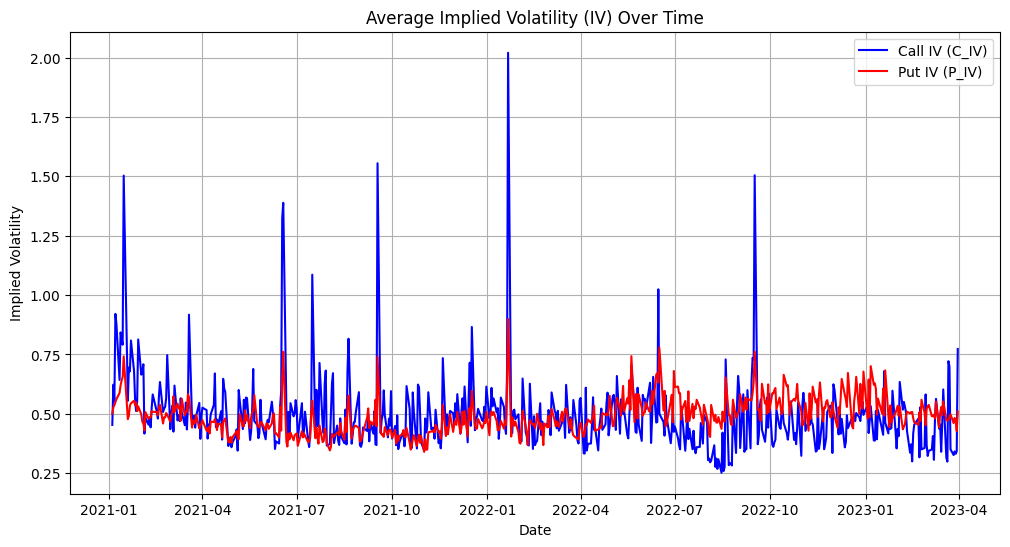


Correlation between Call IV and Put IV: 0.4100

Sending request to Gemini with image and text...

Gemini's Response Text:


Okay, let's break down the provided plot of Average Implied Volatility (IV) for Calls (C_IV) and Puts (P_IV) over time.

**Analysis:**

1.  **Overall Behavior & Volatility of IVs:**
    *   Both Call IV (blue) and Put IV (red) exhibit significant fluctuations over the ~2.25 year period, indicating changing market expectations of future price volatility.
    *   **Call IV is noticeably more volatile than Put IV.** It experiences much sharper and higher spikes.
    *   The baseline for both IVs seems to hover roughly between 0.25 (25%) and 0.75 (75%), but Call IV has several instances of extreme spikes.

2.  **Trends:**
    *   **Call IV (C_IV - Blue):**
        *   There isn't a clear long-term upward or downward trend in the *baseline* of Call IV.
        *   The most dominant feature is its periodic, very sharp spikes. Notable spikes occur around:
            *   Early 2021 (Jan/Feb) - reaching ~1.50
            *   Mid 2021 (June) - reaching ~1.40
            *   Late 2021 (Sept/Oct) - reaching ~1.60
            *   Turn of 2021/2022 (Dec/Jan) - the largest spike, exceeding 2.00
            *   Late 2022 (Sept/Oct) - reaching ~1.50
        *   Between these spikes, Call IV often drops back to levels comparable to or even below Put IV.
    *   **Put IV (P_IV - Red):**
        *   Put IV is comparatively more stable and smoother than Call IV.
        *   It shows a slight, gentle upward trend over the period. In early 2021, its baseline was often around 0.40-0.50. By late 2022 and early 2023, its baseline appears to be more consistently in the 0.50-0.65 range.
        *   While it does react to market volatility, its peaks are much more subdued than Call IV, generally not exceeding 0.80.

3.  **Correlation (0.4100):**
    *   A correlation coefficient of 0.4100 indicates a **positive, moderate correlation**.
    *   **Visual Confirmation:** The lines do generally tend to move in the same direction. When there's an increase in market uncertainty leading to higher IV, both Call and Put IVs tend to rise. Similarly, they often fall together.
    *   **Why not higher?** The moderate nature of the correlation is visually explained by:
        *   **Magnitude Difference:** The spikes in Call IV are far more pronounced. Put IV rises during these events but not nearly to the same extent.
        *   **Leads/Lags or Divergences:** There might be periods where one reacts more strongly or slightly before the other, or where specific market conditions (e.g., strong bullish sentiment driving up call demand, or strong bearish sentiment driving up put demand disproportionately) cause them to diverge more significantly than the correlation suggests for short periods.
        *   The extreme spikes in Call IV are not mirrored proportionally in Put IV, which "dampens" the overall linear correlation.

4.  **Notable Observations & Potential Interpretations:**
    *   **Extreme Call IV Spikes:** These are the most striking feature. Such dramatic increases in Call IV often suggest:
        *   **Anticipation of significant upward price movement:** Speculators buying calls, or investors hedging short positions.
        *   **Earnings announcements or major news events:** If this is an average IV for a specific stock or a sector, these spikes often coincide with such events, where the potential for a large price move (in either direction, but calls become expensive for upside) is high.
        *   **"Fear of Missing Out" (FOMO):** In certain market phases, demand for calls can surge.
    *   **Relative Levels:**
        *   During "calm" periods or between spikes, Call IV and Put IV can trade at similar levels, or Call IV can sometimes be slightly lower.
        *   During the major spikes, Call IV dramatically exceeds Put IV. This indicates that the market is pricing in a much higher likelihood or cost for upside volatility (or protection against it via calls) than for downside volatility via puts *at those specific moments*.
    *   **Volatility Skew/Smile Dynamics:** The difference between Call IV and Put IV (and IVs at different strikes, not shown here) is related to the volatility skew or smile. This plot suggests a dynamic skew, where at times of extreme event risk or speculative fervor, the "call side" of the volatility surface becomes much more expensive.
    *   **Put IV as a Fear Gauge:** While Put IV does rise with general market uncertainty (e.g., the rise in mid-2022 could coincide with broader market concerns), its reaction is more tempered compared to the event-driven spikes in Call IV. The general upward drift in Put IV throughout 2022 might reflect a growing underlying cautiousness or demand for downside protection in the market.

**Summary:**

The data shows that while Call IV and Put IV are moderately correlated, Call IV is significantly more prone to extreme, sharp spikes, likely driven by specific events or speculative activity. Put IV, while responsive to market conditions and showing a gentle upward trend, is far more stable. The periods of extremely high Call IV relative to Put IV suggest that the market, at those times, was pricing in a much greater expectation of, or demand for, upside volatility or options that profit from it.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from PIL import Image as PIL_Image # Import Pillow Image

# Convert the QUOTE_DATE column to datetime for proper grouping.
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'], errors='coerce')

# Step 4: Drop rows where any of these key columns have missing values.
df_clean = df.dropna(subset=['QUOTE_DATE', 'C_IV', 'P_IV'])

# Step 5: Group by QUOTE_DATE and calculate the mean implied volatility for calls and puts.
iv_stats = df_clean.groupby('QUOTE_DATE')[['C_IV', 'P_IV']].mean()

# Display the first few rows of the aggregated data.
print("\nAverage Implied Volatility by Date:")
print(iv_stats.head())

# Step 6: Plot the implied volatility trends for calls and puts over time.
plt.figure(figsize=(12, 6))
plt.plot(iv_stats.index, iv_stats['C_IV'], label='Call IV (C_IV)', color='blue')
plt.plot(iv_stats.index, iv_stats['P_IV'], label='Put IV (P_IV)', color='red')
plt.title('Average Implied Volatility (IV) Over Time')
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)

# Save the figure to a local file
output_dir = 'images_output'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
image_file_path = os.path.join(output_dir, 'iv_trend_plot.png')

# Correct order: savefig BEFORE show
plt.savefig(image_file_path, dpi=300, bbox_inches='tight')
print(f"\nPlot saved to {image_file_path}")

plt.show()      # Now show the plot
plt.close()     # Close the figure to free memory

# image_file_url is not used in the API call part of *this snippet*,
# but kept if you use it elsewhere.
image_file_url = image_file_path

# --- CORRECTED image_part construction ---
# Load the image using PIL (Pillow library)
# The SDK can directly handle PIL Image objects in the 'contents' list.
try:
    pil_image = PIL_Image.open(image_file_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_file_path}. Cannot proceed with API call.")
    # Handle the error appropriately, e.g., exit or skip API call
    pil_image = None # Or raise the exception

# Step 7: Calculate and print the correlation coefficient between call IV and put IV.
correlation = iv_stats['C_IV'].corr(iv_stats['P_IV'])
print(f"\nCorrelation between Call IV and Put IV: {correlation:.4f}")

# Prepare the input text describing the data
text_input = f"""
The data shows average implied volatilities for Calls (C_IV) and Puts (P_IV) grouped by date.
The correlation between Call IV and Put IV is {correlation:.4f}.
Please analyze the trends, correlation, and any notable observations in the attached plot.
"""

# Check if image was loaded successfully before making the API call
if pil_image:
    print("\nSending request to Gemini with image and text...")
    # Call Gemini model (using your specific client structure)
    # The 'contents' list now takes the PIL.Image object directly.
    response = client.models.generate_content(
        model=MODEL_ID,
        contents=[
            pil_image,   # Corrected: Pass the PIL.Image object
            text_input
        ]
    )

    print("\nGemini's Response Text:")
    display(Markdown(response.text))
else:
    print("\nSkipping Gemini API call because the image could not be loaded.")


### 2. Add Moving Averages to Smooth IV Lines

Explanation:
Moving averages help smooth out daily fluctuations and highlight underlying trends in implied volatility.


Plot saved to images_output/iv_ma5_trend_plot.png


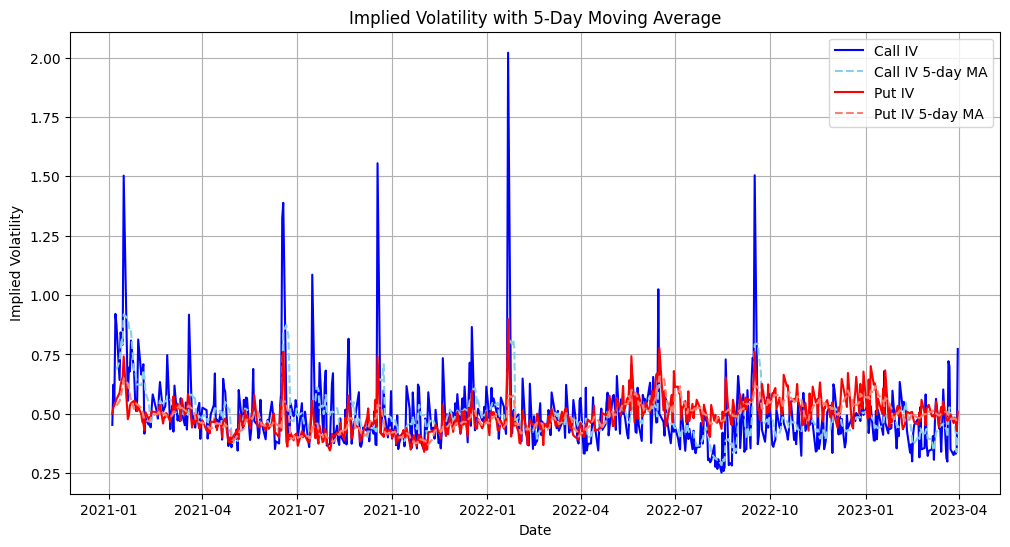


Correlation between Call IV and Put IV: 0.4100

Sending request to Gemini with image and text...

Gemini's Response Text:


Okay, let's break down this chart of Implied Volatility (IV) for Call and Put options.

**Overall Chart Description:**
The chart displays the daily average Call Implied Volatility (Call IV) and Put Implied Volatility (Put IV) from January 2021 to approximately April 2023. It also includes their respective 5-day moving averages (MA) to help smooth out daily fluctuations and identify short-term trends.

**Analysis:**

1.  **Trends:**
    *   **General Volatility:** Both Call IV and Put IV exhibit significant volatility throughout the period, characterized by sharp spikes followed by relatively rapid declines. There isn't a single, sustained long-term upward or downward trend across the entire dataset. Instead, the market appears to move through distinct periods of higher and lower implied volatility.
    *   **Volatility Clustering:** Periods of high volatility tend to be clustered together, and similarly for low volatility. For example, late 2021/early 2022 and late 2022 show heightened activity, while mid-2022 (around Q3) appears somewhat calmer.

2.  **Moving Average Behavior:**
    *   **Smoothing Effect:** The 5-day moving averages effectively smooth out the daily noise of the raw IV data. This makes it easier to discern the immediate direction of IV.
    *   **Lag:** As expected, the MAs lag the actual IV. When there's a sharp spike in IV (e.g., Call IV around December 2021), the MA rises more gradually and peaks slightly after the raw IV. Similarly, it declines more gradually.
    *   **Trend Indication:** The MAs clearly indicate short-term trends. An upward sloping MA suggests increasing IV, and vice-versa. During periods of sideways consolidation in IV, the MAs also tend to flatten out.

3.  **Relationship Between Call IV and Put IV:**
    *   **Correlation (0.4100):** A correlation of 0.41 indicates a moderate positive relationship. This means that, generally, when Call IV increases, Put IV also tends to increase, and vice versa. However, the relationship isn't perfectly linear or extremely strong, suggesting that other factors influence them, sometimes independently.
    *   **Magnitude of Spikes:** A key difference is the magnitude of spikes. **Call IV exhibits significantly larger and sharper spikes than Put IV.** For instance:
        *   Around early 2021, Call IV spikes to ~1.5 while Put IV reaches ~0.75.
        *   Around June-July 2021, Call IV spikes near 1.4, Put IV near 0.75.
        *   The most dramatic spike is in late 2021 (around December), where Call IV shoots above 2.0, while Put IV peaks around 0.8-0.9.
        *   Late 2022 also sees Call IV spike much higher (~1.5) than Put IV (~0.7).
    *   **Baseline Levels:** When not spiking, Put IV often seems to maintain a slightly higher baseline or "floor" compared to Call IV, particularly through 2022 and into 2023. Call IV can drop to lower levels between its sharp upsurges.
    *   **Co-movement:** Despite the difference in spike magnitude, there are periods where they clearly move in tandem (e.g., the general rise in volatility in late 2021, or the increase in late 2022).

4.  **Notable Observations:**
    *   **Extreme Call IV Spikes:** The most prominent feature is the recurrent, very sharp spikes in Call IV. These suggest periods of intense speculative buying of call options or significant market events that disproportionately affect the demand for calls (e.g., strong positive news, earnings anticipation for upside).
    *   **Put IV Behavior:** Put IV is generally more subdued than Call IV in terms of peak height, but it maintains a more consistent level of volatility. This might reflect a persistent underlying demand for downside protection (puts).
    *   **Event-Driven Volatility:** The sharp, short-lived nature of many spikes (especially in Call IV) suggests they are likely event-driven (e.g., earnings announcements, major economic data releases, specific news related to the underlying asset).
    *   **Periods of Divergence:** While correlated, there are moments where one might rise more sharply than the other, reflecting differing market sentiment or expectations for upside versus downside risk. The large Call IV spikes are prime examples of this divergence in magnitude.

**Summary:**
The chart illustrates a dynamic implied volatility environment. Call IV is characterized by extreme, short-lived spikes, suggesting periods of high bullish speculation or specific upside catalysts. Put IV, while also volatile, shows more moderate peaks and a potentially higher baseline, hinting at a more constant demand for hedging. The 5-day moving averages help to clarify short-term trends within this noisy data. The moderate positive correlation indicates that while calls and puts often move in the same general direction, their responses to market stimuli can differ significantly in magnitude.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from PIL import Image as PIL_Image

# Step 1: Convert QUOTE_DATE to datetime
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'], errors='coerce')

# Step 2: Drop rows with missing key columns
df_clean = df.dropna(subset=['QUOTE_DATE', 'C_IV', 'P_IV'])

# Step 3: Group by date and compute daily average implied volatilities
iv_stats = df_clean.groupby('QUOTE_DATE')[['C_IV', 'P_IV']].mean()

# Step 4: Calculate 5-day moving averages
iv_stats['C_IV_MA5'] = iv_stats['C_IV'].rolling(window=5).mean()
iv_stats['P_IV_MA5'] = iv_stats['P_IV'].rolling(window=5).mean()

# Step 5: Plot original IV and 5-day MA
plt.figure(figsize=(12, 6))
plt.plot(iv_stats.index, iv_stats['C_IV'], label='Call IV', color='blue')
plt.plot(iv_stats.index, iv_stats['C_IV_MA5'], label='Call IV 5-day MA', linestyle='--', color='skyblue')
plt.plot(iv_stats.index, iv_stats['P_IV'], label='Put IV', color='red')
plt.plot(iv_stats.index, iv_stats['P_IV_MA5'], label='Put IV 5-day MA', linestyle='--', color='salmon')
plt.title('Implied Volatility with 5-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)

# Step 6: Save the plot
output_dir = 'images_output'
os.makedirs(output_dir, exist_ok=True)
image_file_path = os.path.join(output_dir, 'iv_ma5_trend_plot.png')
plt.savefig(image_file_path, dpi=300, bbox_inches='tight')
print(f"\nPlot saved to {image_file_path}")

plt.show()
plt.close()

# Step 7: Load image with PIL
try:
    pil_image = PIL_Image.open(image_file_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_file_path}")
    pil_image = None

# Step 8: Calculate correlation
correlation = iv_stats['C_IV'].corr(iv_stats['P_IV'])
print(f"\nCorrelation between Call IV and Put IV: {correlation:.4f}")

# Step 9: Prepare Gemini prompt
text_input = f"""
The plot shows daily average implied volatilities for Call (C_IV) and Put (P_IV) options, along with their 5-day moving averages.
The data is grouped by quote date. The 5-day moving average lines are represented with dashed styles.
The correlation between Call IV and Put IV is {correlation:.4f}.
Please analyze the trends, the moving average behavior, the relationship between Call and Put IV, and any notable observations based on the chart.
"""

# Step 10: Call Gemini if image was loaded
if pil_image:
    print("\nSending request to Gemini with image and text...")
    response = client.models.generate_content(
        model=MODEL_ID,
        contents=[
            pil_image,
            text_input
        ]
    )
    print("\nGemini's Response Text:")
    display(Markdown(response.text))
else:
    print("\nSkipping Gemini API call due to missing image.")



### 3. Explore IV Behavior Around Earnings Dates

Explanation:
Earnings dates often cause spikes in implied volatility due to expected market-moving announcements.


Average Implied Volatility by Date:
                C_IV      P_IV
QUOTE_DATE                    
2021-01-04  0.453393  0.501187
2021-01-05  0.622716  0.527018
2021-01-06  0.552435  0.536589
2021-01-07  0.920994  0.548553
2021-01-08  0.876872  0.561582

Plot saved to images_output/iv_with_earnings_plot.png


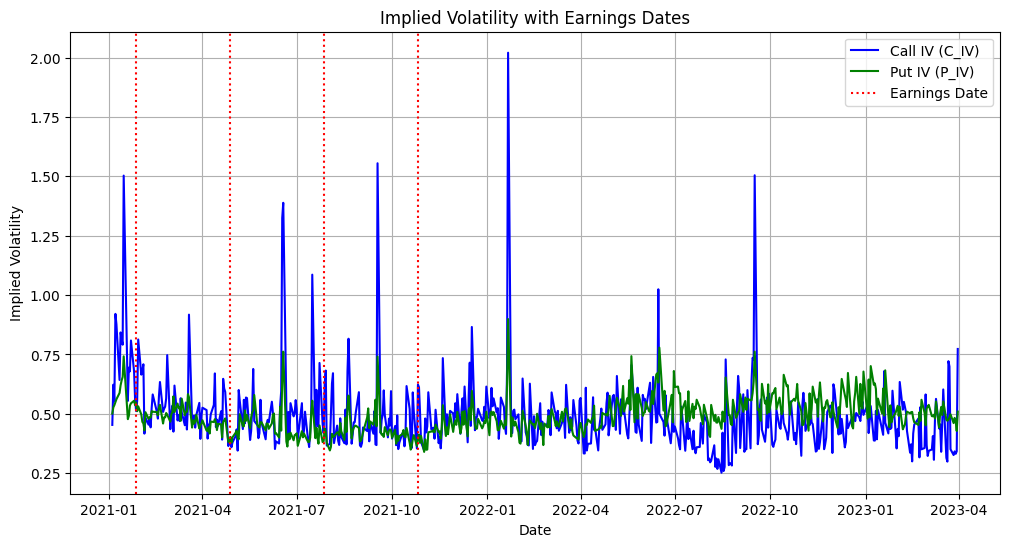


Correlation between Call IV and Put IV: 0.4100

Sending request to Gemini with image and text...

Gemini's Response Text:


Okay, let's break down the provided chart on Implied Volatility (IV).

**Analysis of Implied Volatility Trends**

1.  **Trends Around Earnings Dates:**
    *   **Pre-Earnings Run-up:** There is a clear and consistent pattern of both Call IV (blue line) and Put IV (green line) increasing significantly in the days or weeks leading up to an earnings announcement (red dotted lines). This indicates heightened market expectation of a large price move in the underlying stock due to the uncertainty and potential impact of the earnings report.
    *   **Volatility Crush Post-Earnings:** Immediately following the earnings announcement, there is a sharp and substantial decrease in both Call and Put IV. This "volatility crush" occurs because the uncertainty driving up option prices has been resolved (the earnings news is out).
    *   **Magnitude of Earnings Spikes:** The spikes in IV around earnings are the most prominent features of the chart, often causing IV to double, triple, or even quadruple from its baseline levels.
    *   **Call IV vs. Put IV during Earnings:** Notably, the spikes in **Call IV are consistently much larger** than the spikes in Put IV around earnings dates. This suggests that the demand for call options (or the perceived uncertainty related to upside moves) increases more dramatically than for put options leading into earnings for this specific underlying.

2.  **How Closely Call and Put Volatilities Move Together:**
    *   **General Co-movement:** The provided correlation of 0.4100 indicates a moderate positive relationship. Visually, outside of the extreme earnings-related spikes, Call IV and Put IV generally trend in the same direction. When one is elevated, the other tends to be as well, and vice-versa when they are lower.
    *   **Divergence in Magnitude:** The most significant divergence occurs during the pre-earnings run-up, where Call IV increases far more substantially than Put IV.
    *   **Baseline Difference:** Even in periods between earnings, Call IV frequently appears to trade at a slightly higher level than Put IV, and exhibits more pronounced, smaller spikes. Put IV often appears smoother.

3.  **Other Interesting Patterns Observed:**
    *   **Call IV Dominance:** Call IV is not only higher during earnings spikes but also seems generally more volatile and reactive than Put IV throughout the observed period. It has more frequent and sharper peaks even between earnings events.
    *   **Quarterly Earnings Cycle:** The red dotted lines appear at roughly quarterly intervals, consistent with typical company earnings reporting schedules.
    *   **Peak Volatility:** The highest IV levels (around 2.00 for Call IV) are exclusively associated with earnings announcements.
    *   **Baseline Fluctuation:** The baseline IV (between earnings events) fluctuates, generally staying within a range of approximately 0.25 to 0.75. There isn't a clear long-term upward or downward trend in this baseline over the ~2.25 year period shown, but rather cyclical behavior driven by earnings and other market events.
    *   **Specific High IV Event (Call):** The earnings event around 2022-01 saw a particularly extreme spike in Call IV, reaching the top of the chart's scale.

**Summary:**
The chart clearly illustrates the classic pre-earnings implied volatility run-up and post-earnings volatility crush. Call and Put IV generally move in tandem, but Call IV exhibits significantly larger spikes around earnings and appears to be generally more volatile and often at a slightly higher level than Put IV. This suggests a greater market anticipation or pricing of upside volatility compared to downside volatility, especially leading into catalyst events like earnings for this particular underlying security.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from PIL import Image as PIL_Image  # Import Pillow Image

# Convert the QUOTE_DATE column to datetime for proper grouping.
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'], errors='coerce')

# Drop rows with missing key values.
df_clean = df.dropna(subset=['QUOTE_DATE', 'C_IV', 'P_IV'])

# Group by date and compute average IV for calls and puts.
iv_stats = df_clean.groupby('QUOTE_DATE')[['C_IV', 'P_IV']].mean()

# Display the first few rows.
print("\nAverage Implied Volatility by Date:")
print(iv_stats.head())

# Example earnings dates (add your own as needed)
earnings_dates = ['2021-01-27', '2021-04-28', '2021-07-27', '2021-10-26']

# Plot IV with earnings dates
plt.figure(figsize=(12, 6))
plt.plot(iv_stats.index, iv_stats['C_IV'], label='Call IV (C_IV)', color='blue')
plt.plot(iv_stats.index, iv_stats['P_IV'], label='Put IV (P_IV)', color='green')

# Mark earnings dates
for i, date in enumerate(earnings_dates):
    plt.axvline(pd.to_datetime(date), color='red', linestyle=':',
                label='Earnings Date' if i == 0 else "")

plt.title('Implied Volatility with Earnings Dates')
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)

# Save the figure
output_dir = 'images_output'
os.makedirs(output_dir, exist_ok=True)
image_file_path = os.path.join(output_dir, 'iv_with_earnings_plot.png')
plt.savefig(image_file_path, dpi=300, bbox_inches='tight')
print(f"\nPlot saved to {image_file_path}")

plt.show()
plt.close()

# Load the image using Pillow
try:
    pil_image = PIL_Image.open(image_file_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_file_path}. Cannot proceed with API call.")
    pil_image = None

# Calculate and print the correlation between Call and Put IV
correlation = iv_stats['C_IV'].corr(iv_stats['P_IV'])
print(f"\nCorrelation between Call IV and Put IV: {correlation:.4f}")

# Prepare prompt for Gemini
text_input = f"""
This chart shows the average implied volatilities for Call (C_IV) and Put (P_IV) options over time.
Vertical red dashed lines indicate company earnings dates.

The correlation between Call IV and Put IV is {correlation:.4f}.

Please analyze the trends in implied volatility around earnings dates, describe how closely call and put volatilities move together, and note any interesting patterns you observe.
"""

# Send to Gemini if image is available
if pil_image:
    print("\nSending request to Gemini with image and text...")
    response = client.models.generate_content(
        model=MODEL_ID,
        contents=[
            pil_image,
            text_input
        ]
    )

    print("\nGemini's Response Text:")
    display(Markdown(response.text))
else:
    print("\nSkipping Gemini API call because the image could not be loaded.")


### 4. Calculate Daily IV Spread (C_IV - P_IV)

Explanation:
The spread between call and put IV can indicate market sentiment skew — positive spread suggests bullish sentiment, negative suggests bearish.


Plot saved to images_output/iv_spread_plot.png


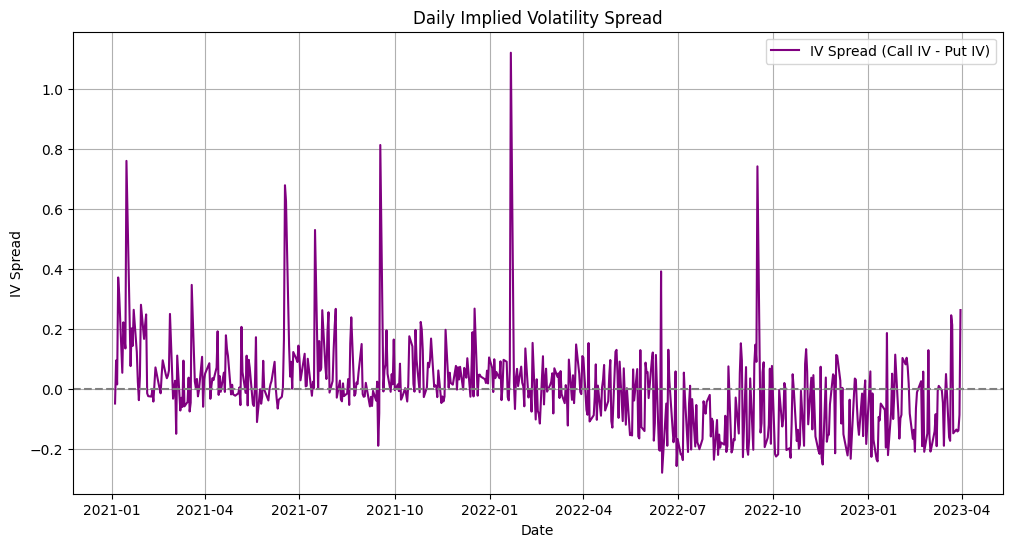


Correlation between Call IV and Put IV: 0.4100

Sending request to Gemini with image and text...

Gemini's Response Text:


Okay, let's break down the Daily Implied Volatility Spread (Call IV - Put IV) plot.

**Analysis of the Implied Volatility Spread Pattern:**

1.  **Fluctuation Around Zero:** The IV spread predominantly fluctuates around the zero line. This indicates that, on many days, the implied volatility of calls and puts are relatively close to each other.
2.  **Predominantly Positive Bias (Slight):** While it crosses into negative territory frequently, the spread appears to spend slightly more time in positive territory, or at least the positive spikes are more pronounced than the negative dips. This would mean Call IV is often slightly higher than, or spikes more aggressively than, Put IV.
3.  **High Volatility of the Spread Itself:** The spread is not stable; it exhibits considerable daily volatility. There are frequent and sharp movements both upwards (Call IV increasing relative to Put IV) and downwards (Put IV increasing relative to Call IV).
4.  **Mean Reversion Tendency:** After significant spikes or dips, the spread tends to revert towards the zero line, although it often overshoots or continues to oscillate.

**Trends and Anomalies:**

1.  **Significant Positive Spikes (Anomalies):**
    *   **Early 2021 (approx. Jan-Feb):** A notable spike to around 0.75.
    *   **Mid-2021 (approx. Jun-Jul):** Another spike reaching near 0.7.
    *   **Late 2021 (approx. Sep-Oct):** A spike to around 0.8.
    *   **Largest Anomaly: Early 2022 (approx. Jan-Feb):** The most prominent spike, where the Call IV - Put IV spread surged dramatically to well over 1.0 (appears to be around 1.1-1.15). This is a very significant deviation.
    *   **Mid-2022 (approx. Aug-Sep):** Another notable spike to around 0.7.
    *   Other smaller, but still sharp, positive spikes are visible throughout the period.
    These spikes indicate periods where the demand for calls (or the perceived volatility for upside moves) far outstripped that for puts.

2.  **Periods of Negative Spread:**
    *   The spread frequently dips into negative territory, generally reaching lows of around -0.2 to -0.25.
    *   These periods occur throughout the timeframe, for example, in mid-2021, late 2021, several times in 2022, and early 2023.
    *   A negative spread (Put IV > Call IV) is often considered more "normal" in equity markets due to the "volatility skew" or "smirk," where out-of-the-money puts trade at higher IVs than equidistant out-of-the-money calls because investors typically fear crashes more than they anticipate euphoric rallies and thus pay a premium for downside protection.

3.  **No Obvious Long-Term Trend in the Mean:** Over the observed period (2021-2023), there isn't a clear sustained upward or downward trend in the average level of the spread. It appears to be oscillating within a range, albeit with significant outliers.

**Significance of IV Spread Dynamics in Market Sentiment or Trading Behavior:**

1.  **Market Sentiment:**
    *   **Positive Spread (Call IV > Put IV):**
        *   Can indicate **bullish sentiment** or anticipation of an upward price movement. Traders might be buying calls speculatively or hedging short positions.
        *   The sharp positive spikes (like early 2022) suggest periods of intense speculative call buying or a strong belief in a significant upside catalyst. This could be related to specific stocks (meme stocks, earnings announcements) or broader market themes.
    *   **Negative Spread (Put IV > Call IV):**
        *   Often reflects **bearish sentiment**, fear, or a desire for downside protection. This is consistent with the typical volatility skew where investors hedge against market declines.
        *   Periods where the spread is consistently negative might indicate increased market anxiety or risk aversion.

2.  **Trading Behavior:**
    *   **Demand for Options:** The spread directly reflects the relative demand for calls versus puts. Spikes show surges in demand for one over the other.
    *   **Hedging Activities:** A strongly negative spread might indicate portfolio managers actively buying puts to hedge long equity positions. Conversely, a positive spread could, in some specific cases (e.g., for short sellers), indicate buying calls to hedge short stock positions.
    *   **Speculation:** The significant positive spikes are strong indicators of speculative activity in call options, possibly driven by news, rumors, or momentum chasing.
    *   **Arbitrage/Relative Value Trades:** Traders might try to profit from perceived mispricings in the spread, expecting it to revert to a historical mean or a "fairer" level. For example, if the spread becomes unusually high, traders might sell calls and buy puts (or construct option strategies) to bet on the spread narrowing.

3.  **Impact of Correlation (Call IV vs. Put IV at 0.4100):**
    *   The correlation of 0.4100 is positive but moderate. This means that while Call IV and Put IV often move in the same general direction (e.g., both rise when overall market uncertainty increases), they do not move in perfect lockstep.
    *   This moderate correlation is precisely what allows for the dynamic and sometimes large spreads observed. If the correlation were very high (e.g., >0.9), the spread would likely be much flatter and closer to zero. The 0.41 value indicates that there are frequent and significant divergences in how the market prices upside versus downside volatility, leading to the observed spread behavior.

In summary, the IV spread is a dynamic indicator. The plot shows a market where sentiment can shift rapidly, with periods of strong bullish speculation (large positive spikes) interspersed with periods of caution or bearishness (negative spread). The early 2022 spike is a particularly strong anomaly, suggesting an extreme event or sentiment shift favoring call options during that time.

In [79]:

import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from PIL import Image as PIL_Image  # Import Pillow Image

# Step 1: Convert QUOTE_DATE to datetime
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'], errors='coerce')

# Step 2: Drop rows with missing values in essential columns
df_clean = df.dropna(subset=['QUOTE_DATE', 'C_IV', 'P_IV'])

# Step 3: Group by QUOTE_DATE and calculate mean IV for calls and puts
iv_stats = df_clean.groupby('QUOTE_DATE')[['C_IV', 'P_IV']].mean()

# Step 4: Calculate IV Spread (Call IV - Put IV)
iv_stats['IV_Spread'] = iv_stats['C_IV'] - iv_stats['P_IV']

# Step 5: Plot the IV Spread over time
plt.figure(figsize=(12, 6))
plt.plot(iv_stats.index, iv_stats['IV_Spread'], label='IV Spread (Call IV - Put IV)', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Daily Implied Volatility Spread')
plt.xlabel('Date')
plt.ylabel('IV Spread')
plt.legend()
plt.grid(True)

# Step 6: Save the figure
output_dir = 'images_output'
os.makedirs(output_dir, exist_ok=True)
image_file_path = os.path.join(output_dir, 'iv_spread_plot.png')
plt.savefig(image_file_path, dpi=300, bbox_inches='tight')
print(f"\nPlot saved to {image_file_path}")

plt.show()
plt.close()

# Step 7: Load image using Pillow
try:
    pil_image = PIL_Image.open(image_file_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_file_path}. Cannot proceed with API call.")
    pil_image = None

# Step 8: Calculate correlation between Call IV and Put IV
correlation = iv_stats['C_IV'].corr(iv_stats['P_IV'])
print(f"\nCorrelation between Call IV and Put IV: {correlation:.4f}")

# Step 9: Prepare prompt for Gemini
text_input = f"""
This dataset presents the average implied volatilities of Calls (C_IV) and Puts (P_IV), as well as their daily spread over time. The spread is calculated as Call IV minus Put IV. The correlation between Call IV and Put IV is {correlation:.4f}.

Please analyze the implied volatility spread pattern, mention any trends or anomalies visible in the attached plot, and discuss the significance of the IV spread dynamics in market sentiment or trading behavior.
"""

# Step 10: Send image and text to Gemini (if image loaded)
if pil_image:
    print("\nSending request to Gemini with image and text...")
    response = client.models.generate_content(
        model=MODEL_ID,
        contents=[
            pil_image,
            text_input
        ]
    )

    print("\nGemini's Response Text:")
    display(Markdown(response.text))
else:
    print("\nSkipping Gemini API call because the image could not be loaded.")


## Conclusion

### 📊 Implied Volatility (IV) Analysis with Visual and AI Insights

This Colab notebook performs a comprehensive analysis of options implied volatility data. It includes data cleaning, statistical aggregation, visualization, and AI-driven interpretation using Google's Gemini model. Below is a breakdown of key steps:

1. **Data Preparation**

   * The dataset is cleaned by parsing the `QUOTE_DATE` column and removing rows with missing values in `C_IV` (Call IV) and `P_IV` (Put IV).

2. **Statistical Aggregation**

   * Average implied volatilities for calls and puts are calculated by date.
   * The **IV Spread** is computed as the difference between `C_IV` and `P_IV`.

3. **Visualization**

   * A time series plot of the **daily IV Spread** is generated.
   * The chart is saved as a high-resolution PNG file for sharing and analysis.

4. **Correlation Analysis**

   * The Pearson correlation between `C_IV` and `P_IV` is computed to quantify their linear relationship.

5. **AI-Powered Interpretation**

   * The plot and summary statistics are passed to the Gemini model.
   * Gemini provides insights on trends, anomalies, and the significance of IV spreads in market behavior.

---

This notebook demonstrates how to combine traditional data analysis with modern generative AI to produce both visual and narrative understanding of financial metrics. It is especially useful for traders, analysts, or students seeking to interpret options market sentiment through implied volatility behavior.
